# Análise Exploratória de Dados (EDA)
**Projeto:** E-commerce Marketplace
**Autor:** Dhiego Coletto Camolesi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

import os
import pandas as pd

RAW_PATH = r'C:\Projetos\ecommerce_data_analysis\data\raw'

def carregar_dados():
    pedidos = pd.read_csv(
        os.path.join(RAW_PATH, 'orders_dataset.csv'), 
        parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date']
    )
    clientes = pd.read_csv(os.path.join(RAW_PATH, 'customers_dataset.csv'))
    pagamentos = pd.read_csv(os.path.join(RAW_PATH, 'order_payments_dataset.csv'))
    produtos = pd.read_csv(os.path.join(RAW_PATH, 'products_dataset.csv'))
    itens = pd.read_csv(os.path.join(RAW_PATH, 'order_items_dataset.csv'))
    reviews = pd.read_csv(os.path.join(RAW_PATH, 'order_reviews_dataset.csv'))
    
    return pedidos, clientes, pagamentos, produtos, itens, reviews

# Descompactar as variáveis diretamente
pedidos, clientes, pagamentos, produtos, itens, reviews = carregar_dados()

print(pedidos.head())



## Evolução dos Pedidos ao Longo do Tempo

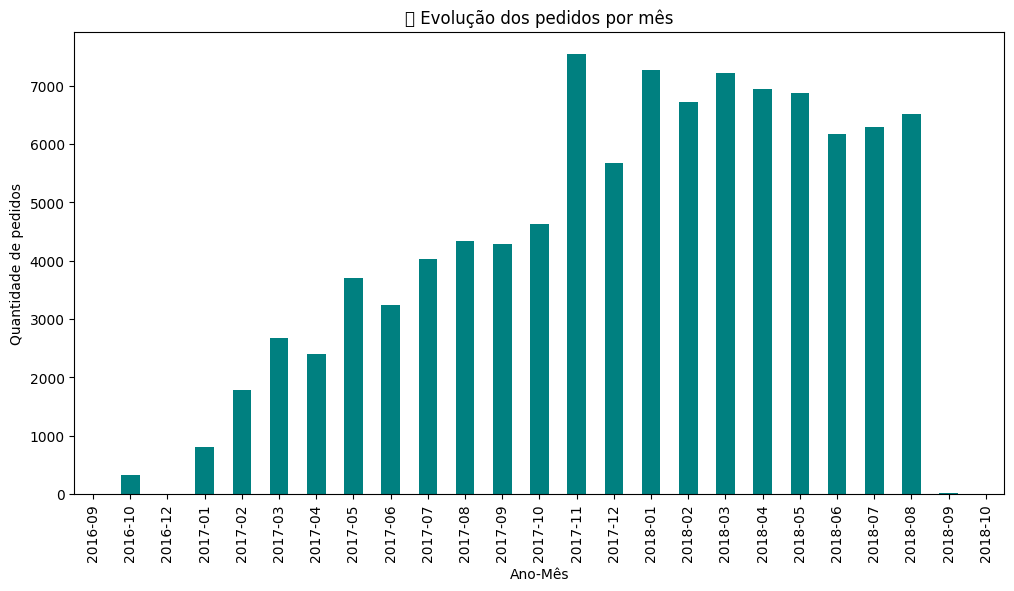

In [ ]:
pedidos_mes = pedidos.groupby(pedidos['order_purchase_timestamp'].dt.to_period('M')).order_id.nunique()
pedidos_mes.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Evolução dos pedidos por mês')
plt.ylabel('Quantidade de pedidos')
plt.xlabel('Ano-Mês')
plt.show()

## Distribuição dos Tipos de Pagamento

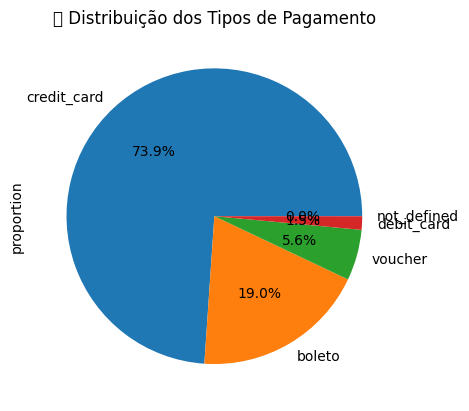

In [ ]:
pagamentos['payment_type'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Pagamento')
plt.show()

## Distribuição dos Clientes por Estado

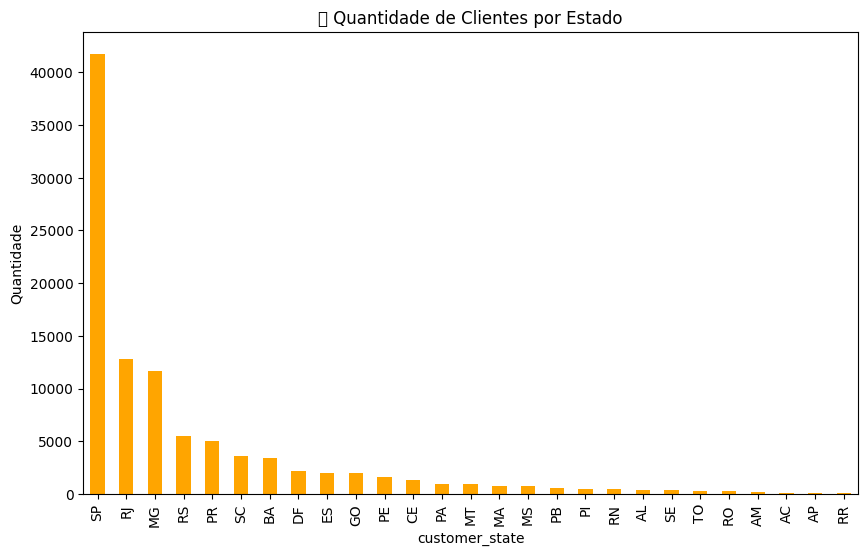

In [ ]:
clientes['customer_state'].value_counts().plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Quantidade de Clientes por Estado')
plt.ylabel('Quantidade')
plt.show()

## Categorias Mais Vendidas

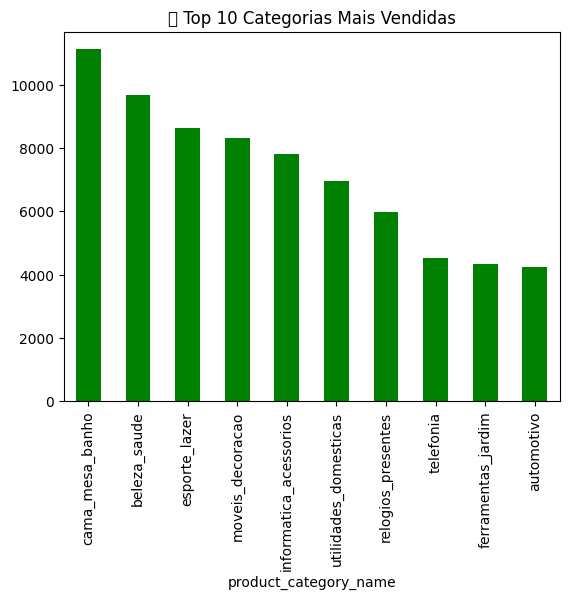

In [ ]:
prod_categorias = produtos.merge(itens, on='product_id')
categorias = prod_categorias['product_category_name'].value_counts().head(10)

categorias.plot(kind='bar', color='green')
plt.title('Top 10 Categorias Mais Vendidas')
plt.show()

## Análise do Tempo de Entrega

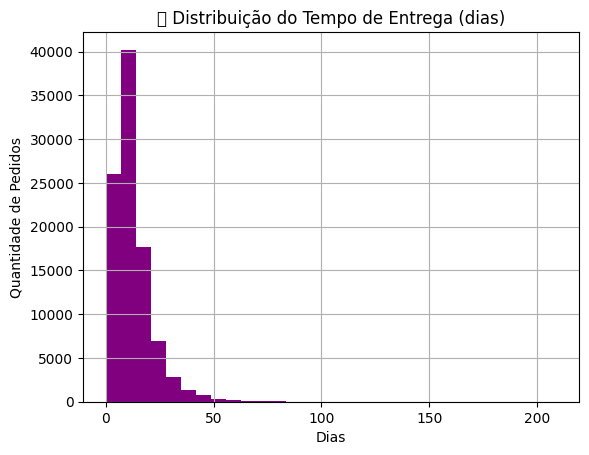

Tempo médio de entrega: 12.094085575687217 dias


In [ ]:
tempo_entrega = (pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']).dt.days.dropna()

tempo_entrega.hist(bins=30, color='purple')
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.xlabel('Dias')
plt.ylabel('Quantidade de Pedidos')
plt.show()

print('Tempo médio de entrega:', tempo_entrega.mean(), 'dias')

## Distribuição das Avaliações dos Clientes

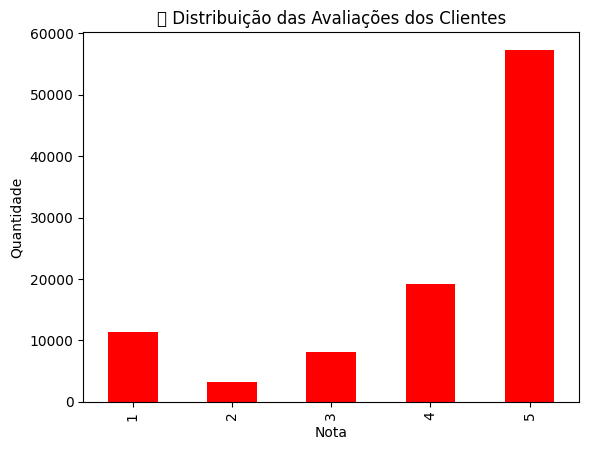

In [ ]:
reviews['review_score'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Distribuição das Avaliações dos Clientes')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.show()